In [3]:
import sys 
sys.path.append("..")

In [4]:
from read_data import DataParser
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import glob
from  tqdm.notebook import tqdm
#sshfs -oProxyCommand="ssh -W %h:%p mrapelli@cmsusr.cern.ch"  mrapelli@brildev1:/brildata/22 try/

In [5]:
mount_path = '/afs/cern.ch/user/m/mrapelli/private/try'

In [6]:
fills = [int (n.split("/")[-1]) for n in glob.glob(mount_path+ "/*") if "bad" not in n and n.split("/")[-1].isnumeric()]
fills

[7637,
 7638,
 7640,
 7641,
 7642,
 7643,
 7644,
 7645,
 7646,
 7647,
 7648,
 7649,
 7650,
 7651,
 7652,
 7653,
 7654,
 7655,
 7656,
 7657,
 7658,
 7659,
 7660,
 7661,
 7662,
 7663,
 7665,
 7667,
 7668,
 7669,
 7670,
 7672,
 7673,
 7674,
 7675,
 7676,
 7677,
 7678,
 7679,
 7680,
 7681,
 7682,
 7684,
 7685,
 7686,
 7687,
 7688,
 7689,
 7690,
 7691,
 7692,
 7693,
 7694,
 7696,
 7697,
 7698,
 7699,
 7700,
 7701,
 7702,
 7703,
 7704,
 7705,
 7706,
 7707,
 7713,
 7714,
 7715,
 7716,
 7717,
 7718,
 7719,
 7720,
 7721,
 7722,
 7723,
 7724,
 7725,
 7726,
 7727,
 7728,
 7729,
 7730,
 7731,
 7733,
 7734,
 7735,
 7736,
 7737,
 7738,
 7739,
 7740,
 7741,
 7742,
 7743,
 7744,
 7745,
 7746,
 7747,
 7748,
 7749,
 7750,
 7751,
 7752,
 7753,
 7754,
 7755,
 7756,
 7757,
 7758,
 7759,
 7760,
 7761,
 7762,
 7764,
 7765,
 7767,
 7768,
 7769,
 7770,
 7772,
 7773,
 7774,
 7775,
 7776,
 7777,
 7778,
 7779,
 7780,
 7783,
 7784,
 7785,
 7786,
 7787,
 7788,
 7789,
 7790,
 7791,
 7792,
 7793,
 7794,
 7795,
 7796,

In [7]:
parser = DataParser (mount_path)

In [6]:
def generate_plots(raw_df, fill_number, save_path=None):
        fig, ax = plt.subplots(1, figsize=(20, 7), sharex=True)
        for ch in range(1,8):
            sns.lineplot(data=raw_df[ch], ax=ax, label=None)
            
        ax.set_title("Fill {}".format(fill_number))
        ax.set(xlabel="Time", ylabel="Preprocessed diff.")
        if save_path:
            plt.savefig(os.path.join(save_path,
                                     f"fill_{fill_number}.pdf"))

In [22]:
import numpy as np
np.shape(fills)

(451,)

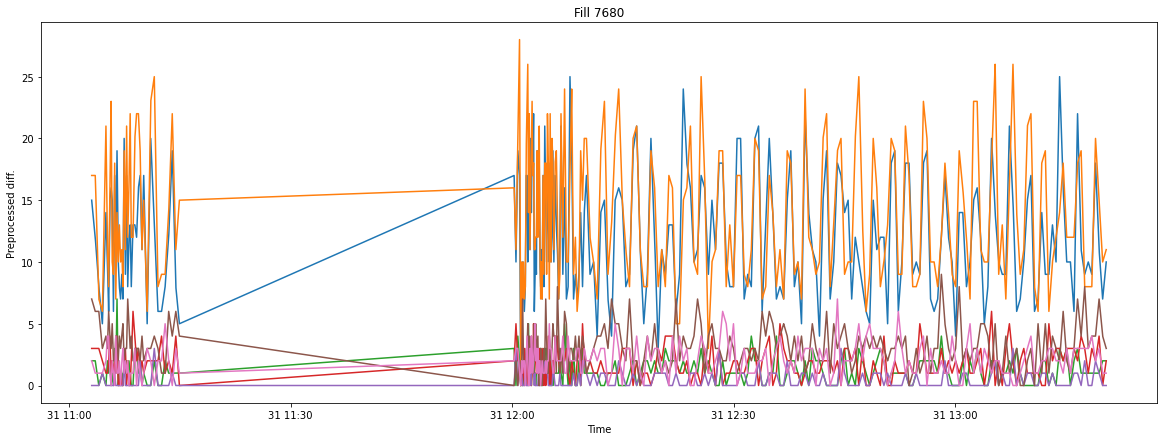

In [24]:
dp = parser.get_raw_data(7680, 20)
generate_plots(dp, 7680 )

In [ ]:
dfs = []
for fill in tqdm(fills[:20]):
    df = parser.get_raw_data(fill,20)
    dfs.append(df)

In [ ]:
dfs
ciao = pd.concat(dfs)